# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [3]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])
data.head()

,movie,actor
0,m1,a1
1,m2,a1
2,m2,a2
3,m3,a1
4,m3,a3


In [4]:
edges = [tuple(x) for x in data.values.tolist()]

In [5]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [90]:
# depreicated ==> A = list(nx.connected_component_subgraphs(B))[0]

# store's all the path in A 
# all the connected component paths
A=list(B.subgraph(c) for c in nx.connected_components(B))[0]
print(A)

Graph with 4703 nodes and 9650 edges


In [7]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


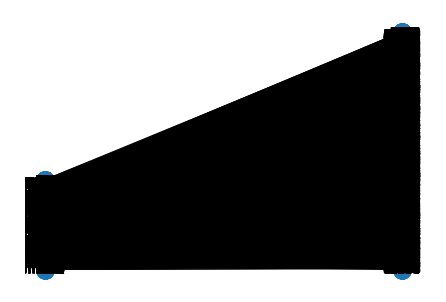

In [81]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [9]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors)) 

# in 4703 nodes : we have 1292 nodes from movies and 3411 nodes of actors

number of movies  1292
number of actors  3411


In [10]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [11]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [12]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [13]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.nodes[node_id]['label'] for node_id in node_ids]

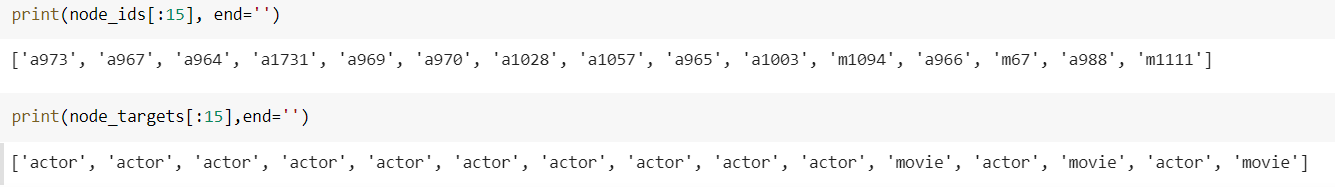

In [16]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    for idx,i in enumerate(node_embeddings):
      if 'm' in node_ids[idx]:
        movie_embeddings.append(i)
      if 'a' in node_ids[idx] :
        actor_embeddings.append(i)

    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    for  id,target in zip(node_ids,node_targets):
      if 'a' in id and 'actor' in target:
        actor_nodes.append(id)
      if 'm' in id and 'movie' in target:
        movie_nodes.append(id)

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


<font color='cyan'>Grader function - 1</font>

In [18]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [19]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [20]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    #cost1= # calculate cost1 

    max = 0

    '''
    whether if actors or movie on the left side or right, the connected components will result the same
    ex : for actors on the left side  and for movie on the left side will also results the same set
    output of connected_components : 
      {'m1', 'm4', 'a1', 'm2'}              {'m1', 'm4', 'a1', 'm2'}
      {'a11', 'm6'}                         {'a11', 'm6'}
      {'m5', 'a5'}                          {'m5', 'a5'}
      {'a10', 'm8'}                         {'a10', 'm8'}
    '''
    # so, now taking the largest length of a connected components
    for i in nx.connected_components(graph): # each i is a one path output as set
      if len(i) > max:
        max = len(i)

    # length of the graph
    total_no_of_nodes_in_cluster = len(graph)
    # cost1
    cost1 = (1/number_of_clusters) * ((max)/total_no_of_nodes_in_cluster)

    return cost1

In [23]:
cost1(graded_graph,3)

0.13333333333333333

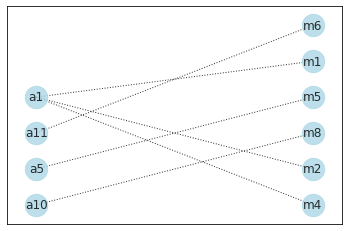

In [22]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [24]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    print(data)
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

0.13333333333333333


True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [25]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost2'''
    #cost2= # calculate cost2
    sum_degree_actor_nodes = 0
    unique_movie_nodes = set()

    for i in graph.degree() : # graph.degree output : [('a1', 3), ('a5', 1), ('a10', 1), ('a11', 1), ('m1', 1), ('m2', 1), ('m4', 1), ('m6', 1), ('m5', 1), ('m8', 1)]
      
      if 'a' in i[0]: # ('a1',3), checking actor node or not
        sum_degree_actor_nodes += i[1]
      else:
        unique_movie_nodes.add(i[0])
    
    cost2 = (1/number_of_clusters) * (sum_degree_actor_nodes/len(unique_movie_nodes))
   
    
    return cost2

In [26]:
cost2(graded_graph,3)

0.3333333333333333

<font color='cyan'>Grader function - 4</font>

In [27]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [50]:
from sklearn.cluster import KMeans
from tqdm import tqdm

def best_k_actor():

  # [3, 5, 10, 30, 50, 100, 200, 500]
  k = []
  max_cost = 0
  cost_dict = dict()

  for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
    print("\nprocessing.....\n")
    print("="*5," KMeans for cluster ",number_of_clusters,"="*5)
    algo = KMeans(n_clusters = number_of_clusters)
    algo.fit(actor_embeddings)
    cluster_labels = list(algo.labels_)
    k = list(algo.labels_)
    #print(list(algo.labels_),end='\n')
    #print(len(algo.labels_))

    idicies_of_clusters = []
    unique_cluster_val = list(set(cluster_labels))
 
    # ex: if I take cluster 3 then we have [0,1,2] are three clusters
    # we are iterating for each clusters like 0,1 and 2
    cost1_val = 0
    cost2_val = 0
    cost_list_tupel = []

    for each_cluster in unique_cluster_val:

      # The result will be of the form 
      # cluster_labels ==> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1]
      # as per actor_nodes kMeans algo assigned these clusters
      # we are retrieving the indedx of these similar clusters, 0 th cluster index, 1st cluster index
      clusters_idx = [idx for idx, val in enumerate(cluster_labels) if val == each_cluster]
      idicies_of_clusters.append(clusters_idx)

      # based on clusters_idx storing the corresponding actor nodes
      actor_nodes_each_cluster = [actor_nodes[i] for i in clusters_idx] 
    
      # for each actor building the sub_graph
      # ex: [nx.ego_graph(B,i) for i in ['a973','a967','a964']] will ouput three subgraphs
      sub_graphs_list = [nx.ego_graph(B,i) for i in actor_nodes_each_cluster]

      # combining the graph
      # as nx.compose will combine two graphs at a time.
      # combining 0th and 1st graph in a sub_graphs_list

      # if the cluster length is <= 1
      if len(sub_graphs_list) <= 1 :
        cost1_val += cost1(sub_graphs_list[0],number_of_clusters)
        cost2_val += cost2(sub_graphs_list[0],number_of_clusters)
        continue

      f = nx.compose(sub_graphs_list[0],sub_graphs_list[1])

      # Builiding the one full graph by combining all sub_graphs
      for i in range(2,len(sub_graphs_list)):
        f = nx.compose(f,sub_graphs_list[i]) # combing all the sub_graphs

      # calculating cost
      cost1_val += cost1(f,number_of_clusters)
      cost2_val += cost2(f,number_of_clusters)
    
      # finally we got a graph1 as f. Similarlly for another cluster
      #sub_graph1 = nx.ego_graph(B,'a973')
      #actor_neighbors = [B[i] for i in actor_nodes_each_cluster]
    cost_list_tupel.append((cost1_val,cost2_val))
    cost_dict[number_of_clusters] = str(cost_list_tupel) + str('\tcost1*cost2 = '+str(cost1_val*cost2_val)) 

  return  max_cost_with_best_k(cost_dict)
  
    


In [49]:
# checking max cost1*cost2
# to consider that as best k_clusters

def max_cost_with_best_k(cost_dict):

  max_cost = 0
  best_k = ''

  for k,v in cost_dict.items(): # iterating over all key value pairs ex: {3 (key) : (cost1,cost2)'[(0.906381065815995, 4.096422711271991)] cost1*cost2 = 3.712919983075555'}
    cost_val = float(v.split('cost1*cost2 = ')[1]) # converting the cost1*cost2 metric into float
    if  cost_val > max_cost:
      max_cost = cost_val
      best_k = k

  print("The best_k val with cost {} is : {}".format(max_cost,best_k))
  return best_k

  


In [52]:
# for good no.of clusters with high cost1*cost2
best_cluster = best_k_actor()


processing.....

=====  KMeans for cluster  3 =====

processing.....

=====  KMeans for cluster  5 =====

processing.....

=====  KMeans for cluster  10 =====

processing.....

=====  KMeans for cluster  30 =====

processing.....

=====  KMeans for cluster  50 =====

processing.....

=====  KMeans for cluster  100 =====

processing.....

=====  KMeans for cluster  200 =====

processing.....

=====  KMeans for cluster  500 =====
The best_k val with cost 3.716594960892774 is : 3


In [92]:
# running KMeans alogrithm for best_k value

'KMeans for actor_embeddings'
algo_actor = KMeans(n_clusters = best_cluster)
algo_actor.fit(actor_embeddings)

print(algo_actor.labels_)



[1 1 1 ... 2 2 2]


<font color='blue'>Displaying similar actor clusters</font>

In [93]:
# applying TSNE for transforming 128 dim to 2 dim for visualization
from sklearn.manifold import TSNE

transform = TSNE #PCA

trans = transform(n_components=2)
actor_node_embeddings_2d = trans.fit_transform(actor_embeddings)


In [96]:

from collections import Counter

for k,v in Counter(algo_actor.labels_).items():
  print( " we have {} points belongs to cluster {}".format(v,k))



 we have 69 points belongs to cluster 1
 we have 418 points belongs to cluster 0
 we have 2924 points belongs to cluster 2


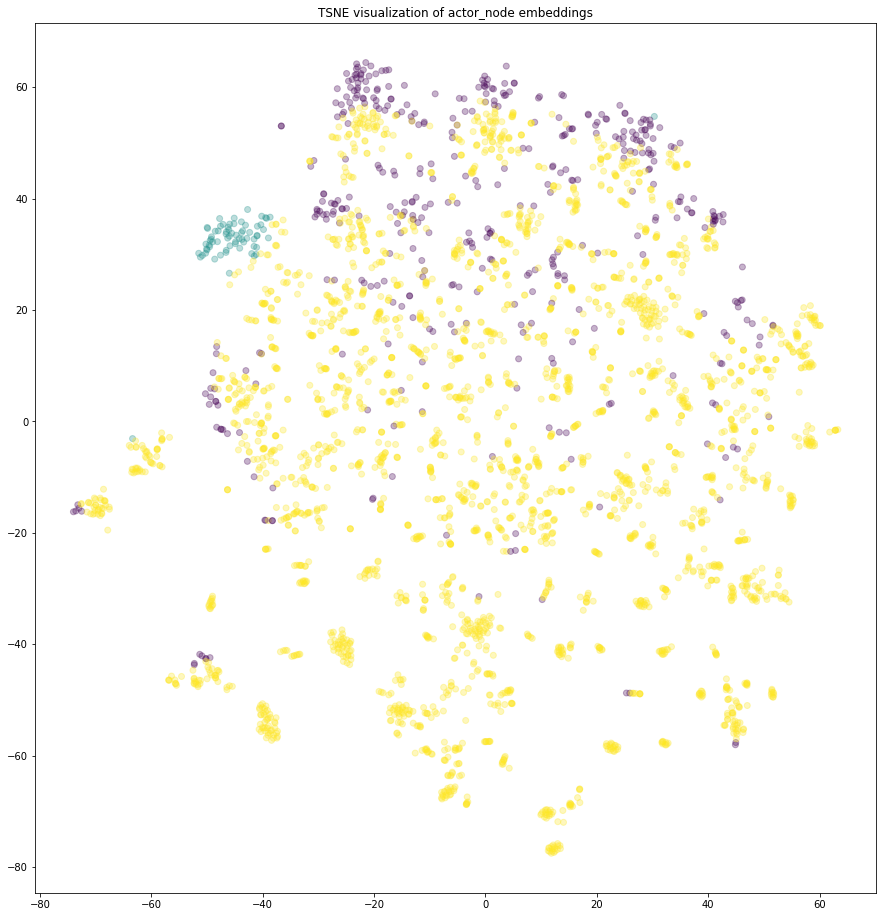

In [97]:
import numpy as np
# draw the points

actor_node_tagets = algo_actor.labels_
label_map = { l: i for i, l in enumerate(np.unique(algo_actor.labels_))}
node_colours = [ label_map[target] for target in actor_node_tagets]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(actor_node_embeddings_2d[:,0], 
            actor_node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of actor_node embeddings'.format(transform.__name__))

plt.show()

<font color='blue'>Grouping similar movies</font>

In [98]:
from sklearn.cluster import KMeans
from tqdm import tqdm

def best_k_movie():

  max_cost = 0
  cost_dict = dict()

  for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
    print("\nprocessing.....\n")
    print("="*5," KMeans for cluster ",number_of_clusters,"="*5)
    algo = KMeans(n_clusters = number_of_clusters)
    algo.fit(movie_embeddings)
    cluster_labels = list(algo.labels_)
  
    unique_cluster_val = list(set(cluster_labels))
 
    # ex: if I take cluster 3 then we have [0,1,2] are three clusters
    # we are iterating for each clusters like 0,1 and 2
    cost1_val = 0
    cost2_val = 0
    cost_list_tupel = []

    for each_cluster in unique_cluster_val:

      # The result will be of the form 
      # cluster_labels ==> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1]
      # as per actor_nodes kMeans algo assigned these clusters
      # we are retrieving the indedx of these similar clusters, 0 th cluster index, 1st cluster index
      clusters_idx = [idx for idx, val in enumerate(cluster_labels) if val == each_cluster]
      
      # based on clusters_idx storing the corresponding actor nodes
      movie_nodes_each_cluster = [movie_nodes[i] for i in clusters_idx] 
    
      # for each actor building the sub_graph
      # ex: [nx.ego_graph(B,i) for i in ['a973','a967','a964']] will ouput three subgraphs
      sub_graphs_list = [nx.ego_graph(B,i) for i in movie_nodes_each_cluster]

      # combining the graph
      # as nx.compose will combine two graphs at a time.
      # combining 0th and 1st graph in a sub_graphs_list

      # if the cluster length is <= 1
      if len(sub_graphs_list) <= 1 :
        cost1_val += cost1(sub_graphs_list[0],number_of_clusters)
        cost2_val += cost2(sub_graphs_list[0],number_of_clusters)
        continue

      f = nx.compose(sub_graphs_list[0],sub_graphs_list[1])

      # Builiding the one full graph by combining all sub_graphs
      for i in range(2,len(sub_graphs_list)):
        f = nx.compose(f,sub_graphs_list[i]) # combing all the sub_graphs

      # calculating cost
      cost1_val += cost1(f,number_of_clusters)
      cost2_val += cost2(f,number_of_clusters)
    
      # finally we got a graph1 as f. Similarlly for another cluster
      #sub_graph1 = nx.ego_graph(B,'a973')
      #actor_neighbors = [B[i] for i in actor_nodes_each_cluster]
    cost_list_tupel.append((cost1_val,cost2_val))
    cost_dict[number_of_clusters] = str(cost_list_tupel) + str('\tcost1*cost2 = '+str(cost1_val*cost2_val)) 

  return  max_cost_with_best_k(cost_dict)
  
    


In [101]:
best_k_for_movie_nodes = best_k_movie()


processing.....

=====  KMeans for cluster  3 =====

processing.....

=====  KMeans for cluster  5 =====

processing.....

=====  KMeans for cluster  10 =====

processing.....

=====  KMeans for cluster  30 =====

processing.....

=====  KMeans for cluster  50 =====

processing.....

=====  KMeans for cluster  100 =====

processing.....

=====  KMeans for cluster  200 =====

processing.....

=====  KMeans for cluster  500 =====
The best_k val with cost 14.855044239639648 is : 50


In [102]:
# running KMeans alogrithm for best_k value

'KMeans for actor_embeddings'
algo_movie = KMeans(n_clusters = best_k_for_movie_nodes)
algo_movie.fit(movie_embeddings)

print(algo_movie.labels_)

[22 30 21 ...  3  3  3]


<font color='blue'>Displaying similar movie clusters</font>

In [103]:
# applying TSNE for transforming 128 dim to 2 dim for visualization
from sklearn.manifold import TSNE

transform_movie = TSNE #PCA

trans_movie = transform_movie(n_components=2)
movie_node_embeddings_2d = trans_movie.fit_transform(movie_embeddings)


In [107]:

for k,v in Counter(algo_movie.labels_).items():
  print( " we have {} points belongs to cluster {}".format(v,k))

 we have 4 points belongs to cluster 22
 we have 1 points belongs to cluster 30
 we have 1 points belongs to cluster 21
 we have 12 points belongs to cluster 18
 we have 1 points belongs to cluster 38
 we have 1 points belongs to cluster 29
 we have 6 points belongs to cluster 10
 we have 19 points belongs to cluster 32
 we have 1 points belongs to cluster 47
 we have 2 points belongs to cluster 17
 we have 1 points belongs to cluster 45
 we have 16 points belongs to cluster 33
 we have 25 points belongs to cluster 15
 we have 11 points belongs to cluster 43
 we have 2 points belongs to cluster 35
 we have 1 points belongs to cluster 41
 we have 13 points belongs to cluster 11
 we have 7 points belongs to cluster 7
 we have 12 points belongs to cluster 37
 we have 4 points belongs to cluster 16
 we have 4 points belongs to cluster 48
 we have 4 points belongs to cluster 2
 we have 20 points belongs to cluster 6
 we have 2 points belongs to cluster 44
 we have 32 points belongs to clust

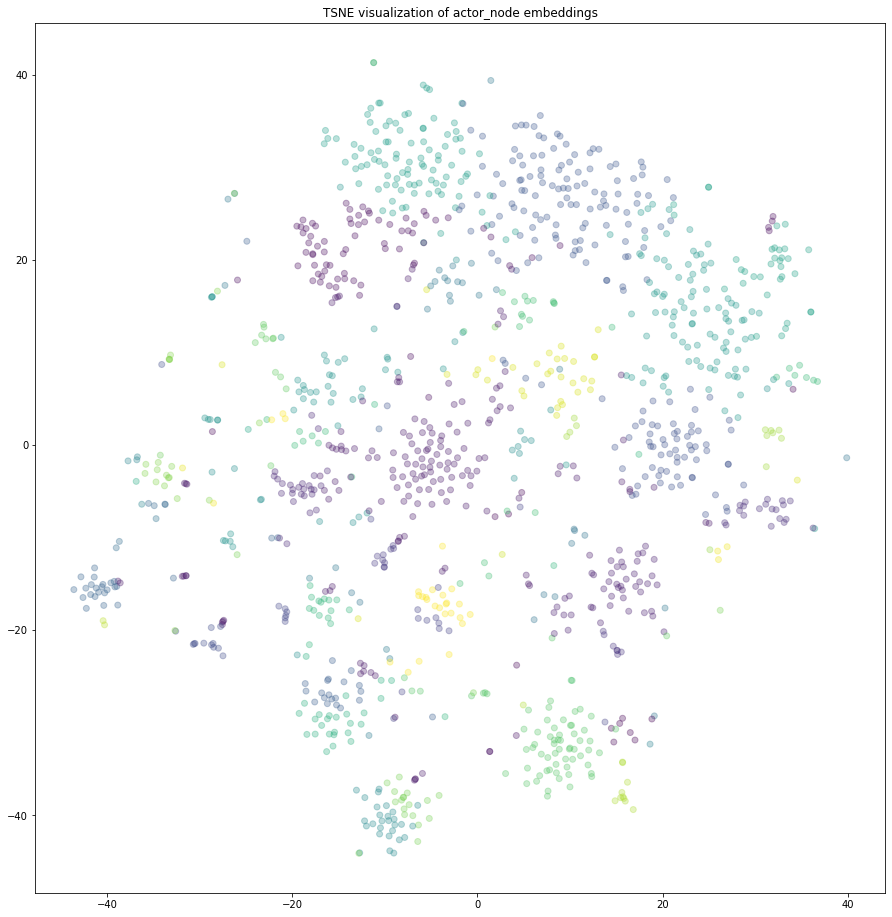

In [106]:
import numpy as np
# draw the points

movie_node_tagets = algo_movie.labels_
label_map = { l: i for i, l in enumerate(np.unique(algo_movie.labels_))}
node_colours = [ label_map[target] for target in movie_node_tagets]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(movie_node_embeddings_2d[:,0], 
            movie_node_embeddings_2d[:,1], 
            c=node_colours, alpha=0.3)
plt.title('{} visualization of actor_node embeddings'.format(transform_movie.__name__))

plt.show()

# Final picture of what I did


![](Clustering_picture.png)